# Predicting Housing Prices Project

## Project Outline
### 0. Problem Definition  
### 1. Import Libraries
### 2. Data Import  
### 3. Data Exploration (EDA)  
### 4. Data Cleaning & Preprocessing  
### 5. Modeling  
### 6. Evaluation  
### 7. Deployment  
### 8. Documentation & Reporting  
### 9. Conclusion & Future Work  

## 1. Import Libraries

In [87]:
# Data and Processing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import skew, kurtosis, pearsonr
import math

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


## 2. Data Import

In [9]:
train_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/train.csv'
test_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

## 3. Data Exploration

### 3.1 Preview the Data

In [ ]:
display(df_train.head())
display(df_test.head())
print(df_train.shape, df_test.shape)
print(df_train.columns)
df_train.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1460, 81) (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### 3.2 Understand Data Types

In [41]:
df_features = df_train.drop(columns=['SalePrice','Id'])  # drop the target
df_target = df_train['SalePrice']
display(df_features.dtypes.to_frame(name='Data Type'))
display(df_features.dtypes.value_counts())

# Separate features by Type
numeric_cols = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_features.select_dtypes(include='object').columns.tolist()
bool_cols = df_features.select_dtypes(include='bool').columns.tolist()

# Display the number of unique values in each feature
df_features.nunique().sort_values()


,Data Type
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MiscVal,int64
MoSold,int64
YrSold,int64
SaleType,object


object     43
int64      33
float64     3
Name: count, dtype: int64

CentralAir         2
Street             2
Alley              2
Utilities          2
GarageFinish       3
                ... 
TotalBsmtSF      721
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Length: 79, dtype: int64

### 3.3 Identify Missing Values

,Missing Count,Missing %
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


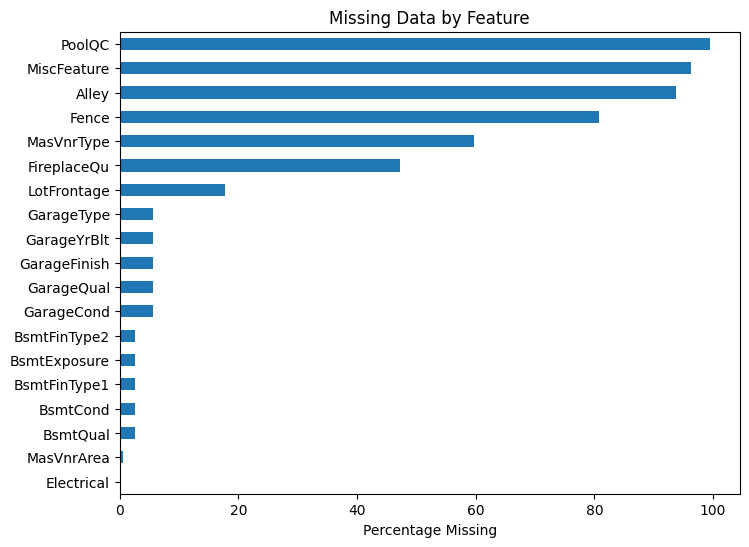

Missing in Numeric Columns:


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Missing in Categorical Columns:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
dtype: int64

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,missing_row_count,missing_row_percent
1218,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2006,WD,Normal,16,19.753086
533,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,NaN,NaN,NaN,0,1,2007,WD,Normal,16,19.753086
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2008,WD,AdjLand,16,19.753086
1011,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,16,19.753086
1179,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,4,2006,WD,Normal,15,18.518519


In [ ]:
# Display missing values summary
missing_counts = df_features.isnull().sum()
missing_percent = df_features.isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]\
                    .sort_values(by='Missing %', ascending=False)

display(missing_summary)

# Visualize missing values
missing_summary['Missing %'].plot(kind='barh', figsize=(8, 6))
plt.xlabel("Percentage Missing")
plt.title("Missing Data by Feature")
plt.gca().invert_yaxis()
plt.show()

missing_numeric = df_features[numeric_cols].isnull().sum().sort_values(ascending=False)
missing_categorical = df_features[categorical_cols].isnull().sum().sort_values(ascending=False)

print("Missing in Numeric Columns:")
display(missing_numeric[missing_numeric > 0])

print("Missing in Categorical Columns:")
display(missing_categorical[missing_categorical > 0])

# Display row counts for missing values
df_features['missing_row_count'] = df_features.isnull().sum(axis=1)
df_features['missing_row_percent'] = df_features.isnull().mean(axis=1) * 100
df_features.sort_values('missing_row_percent', ascending=False).head()


### 3.4 Explore Target Variable

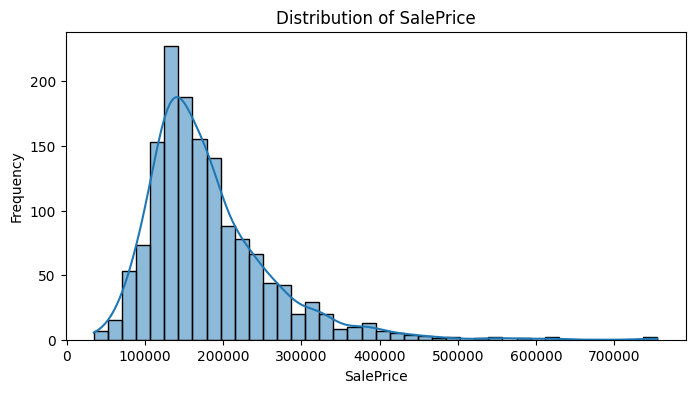

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.88
Kurtosis: 6.51


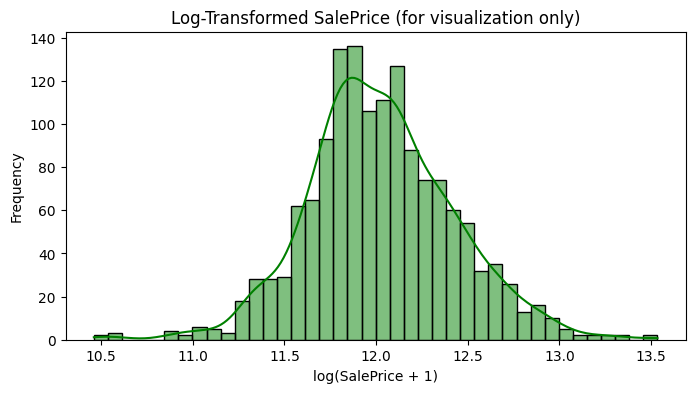

Log Skewness: 0.12
Log Kurtosis: 0.80


In [54]:
# Distribution of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(df_target, kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Display SalePrice statistics
display(df_target.describe())

# Display skewness and kurtosis of SalePrice
print(f"Skewness: {skew(df_target):.2f}")
print(f"Kurtosis: {kurtosis(df_target):.2f}")

# Log transformation of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df_target), kde=True, bins=40, color='green')
plt.title("Log-Transformed SalePrice (for visualization only)")
plt.xlabel("log(SalePrice + 1)")
plt.ylabel("Frequency")
plt.show()

# Compare skew/kurtosis
print(f"Log Skewness: {skew(np.log1p(df_target)):.2f}")
print(f"Log Kurtosis: {kurtosis(np.log1p(df_target)):.2f}")


### 3.5 Explore Numerical Features

#### 3.5.1 Overview of Numerical Feature's Distributions

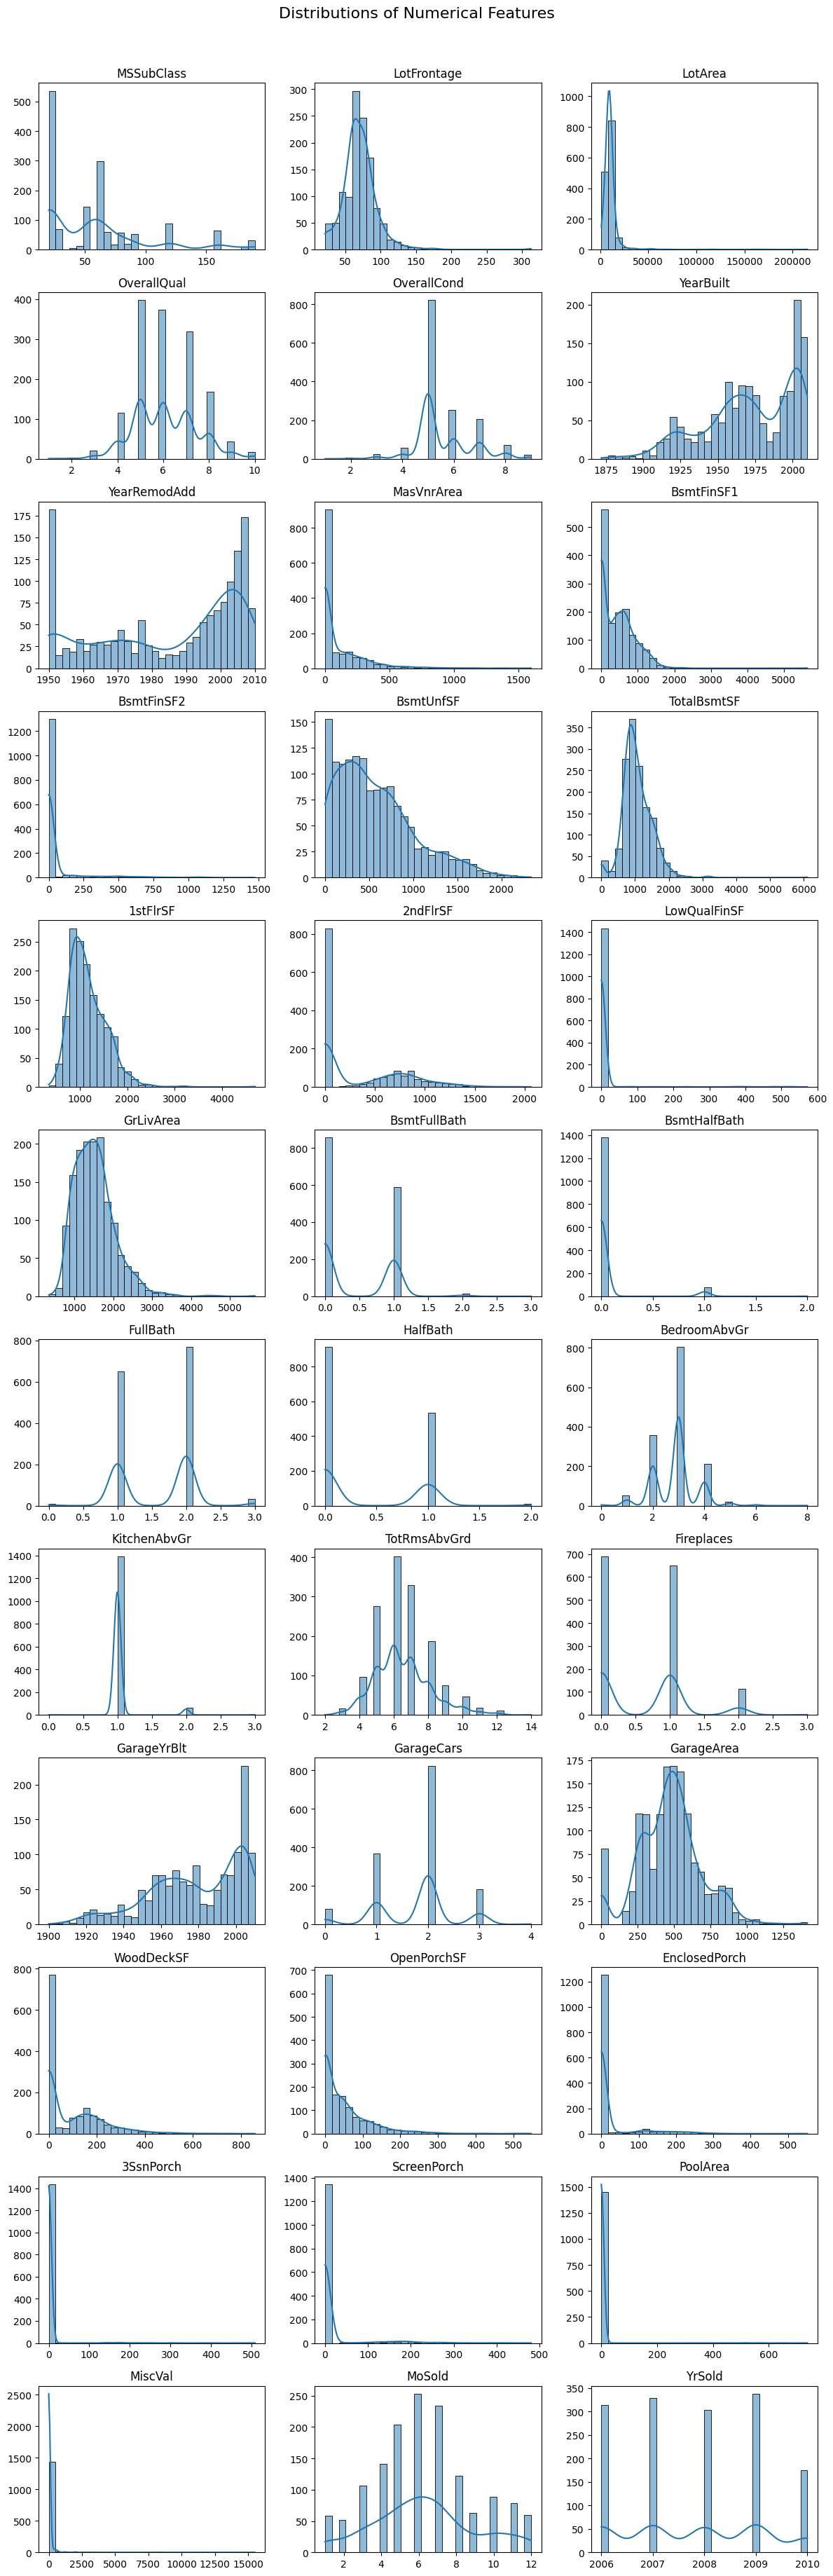

In [67]:
# Basic statistics for numeric features
df_train[numeric_cols].describe().T.sort_values('std', ascending=False)

# Plot all numeric columns
# Set up number of columns and rows
num_features = len(numeric_cols)
cols = 3  # number of plots per row
rows = math.ceil(num_features / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

# Plot each numeric feature
for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()

#### 3.5.2 Analyze Skewness

,Skewness
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341
KitchenAbvGr,4.488397
BsmtFinSF2,4.255261
ScreenPorch,4.122214
BsmtHalfBath,4.103403
EnclosedPorch,3.089872


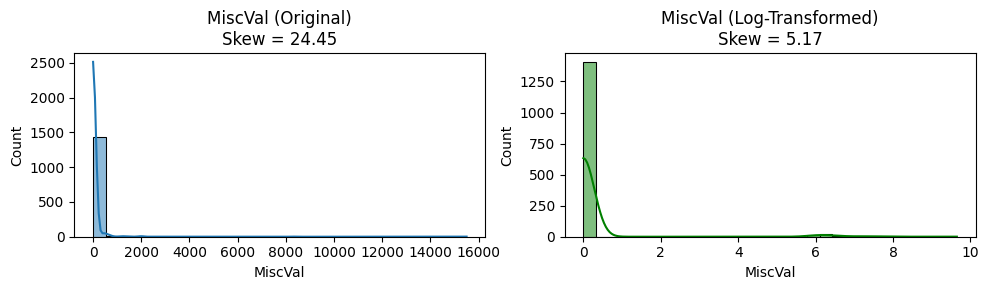

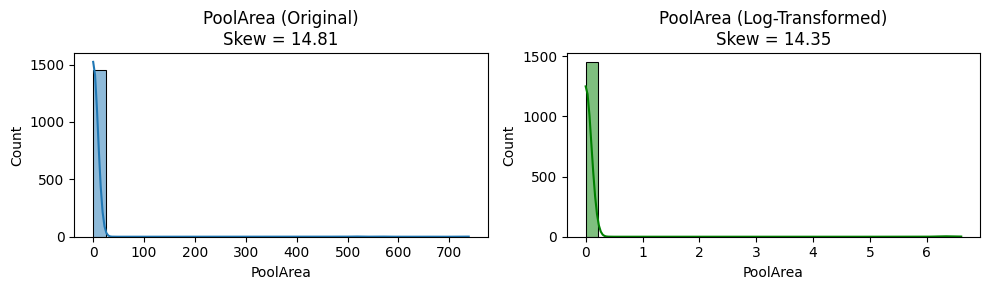

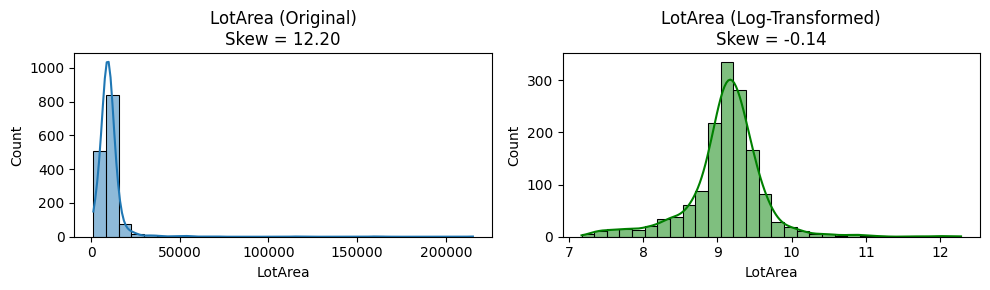

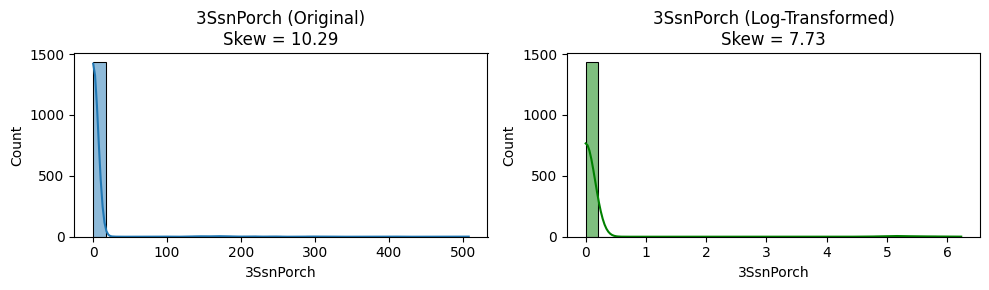

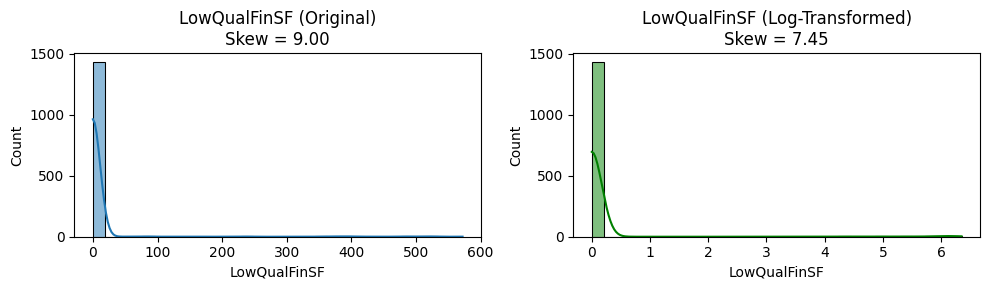

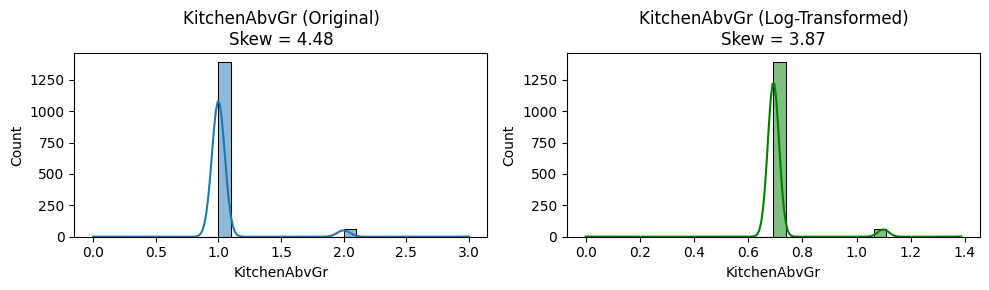

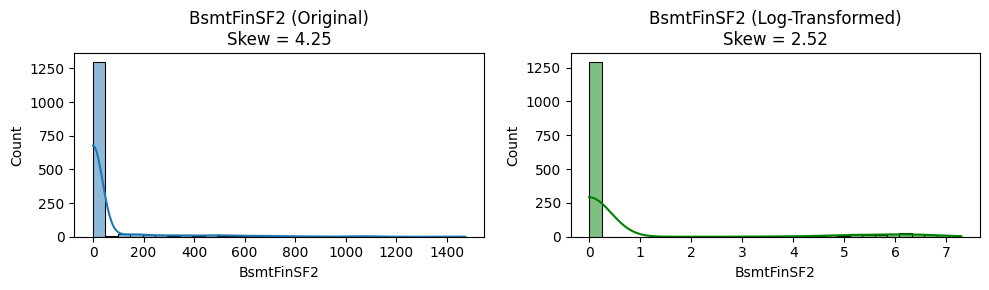

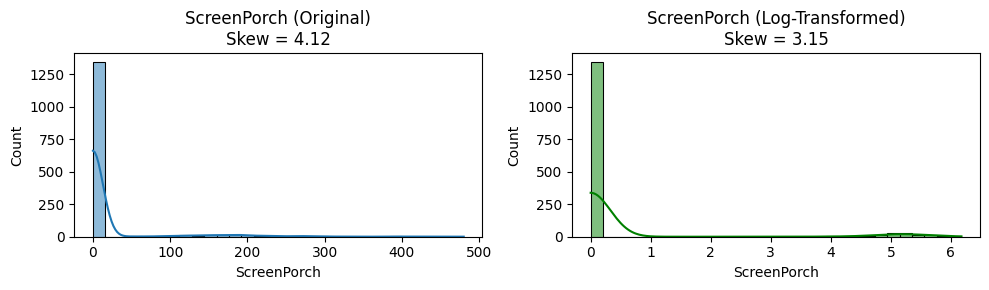

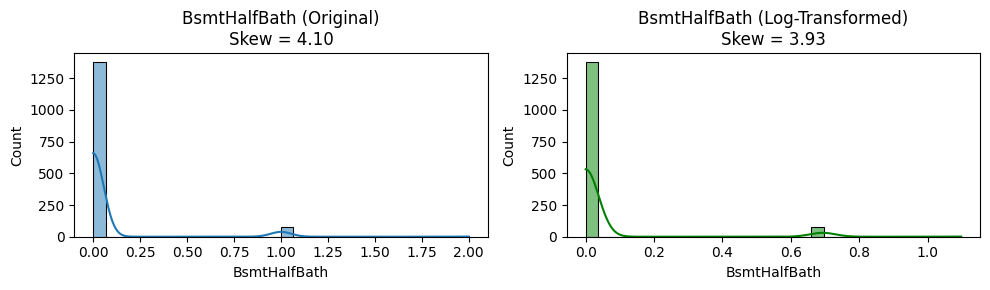

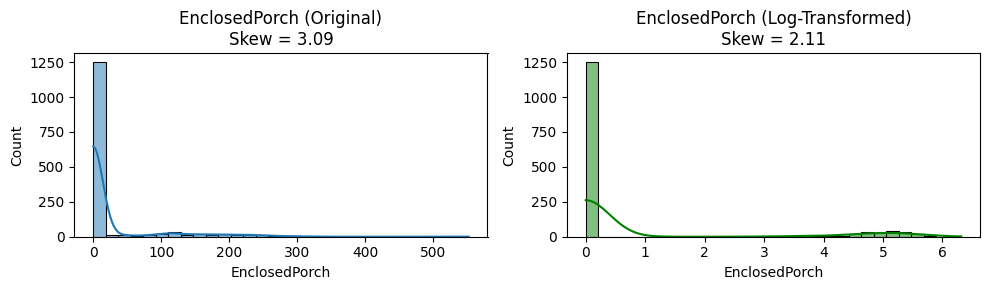

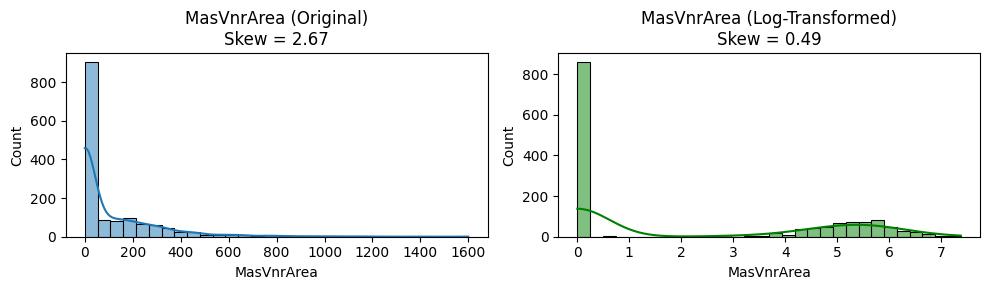

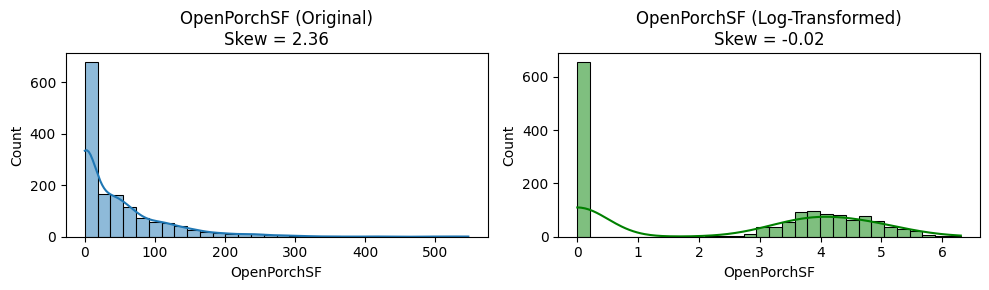

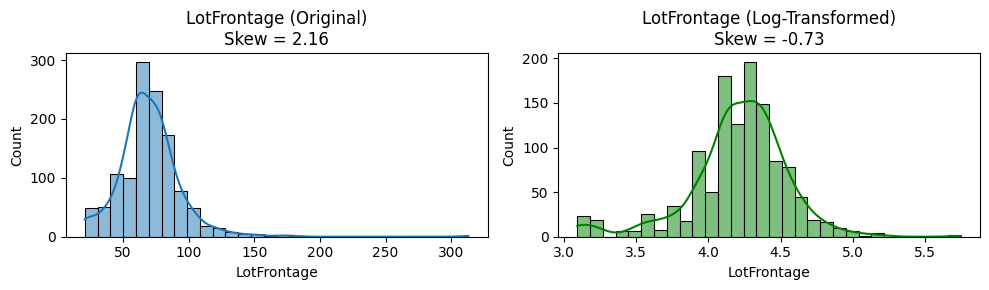

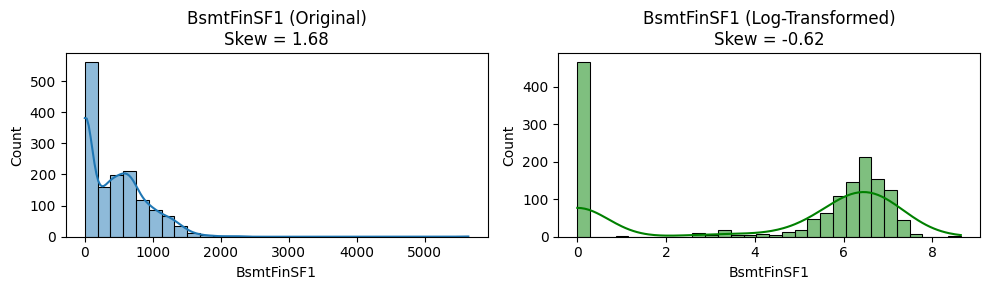

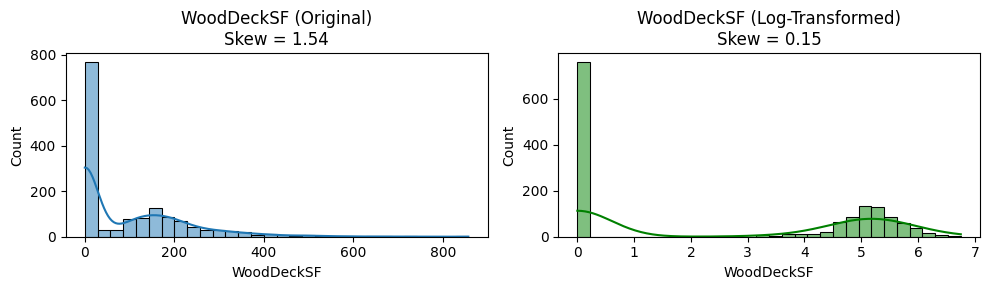

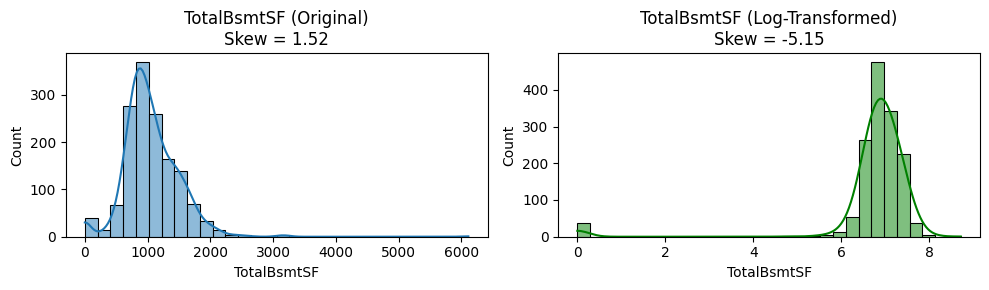

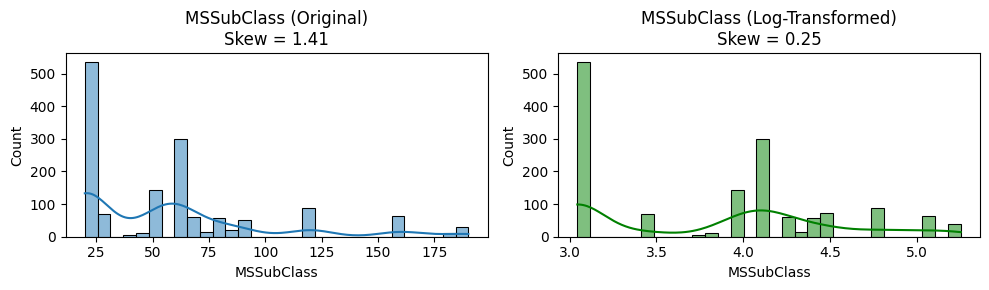

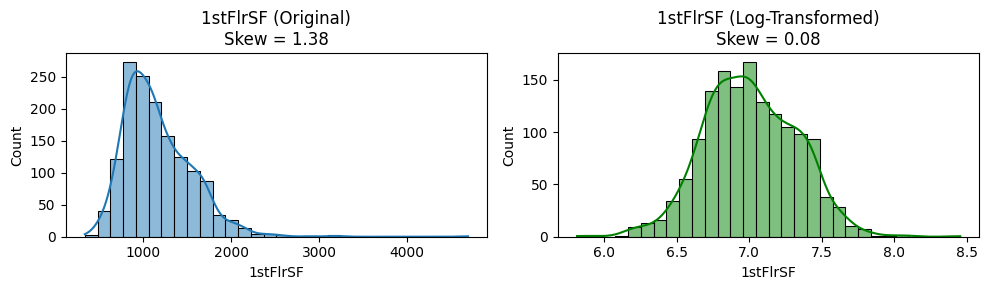

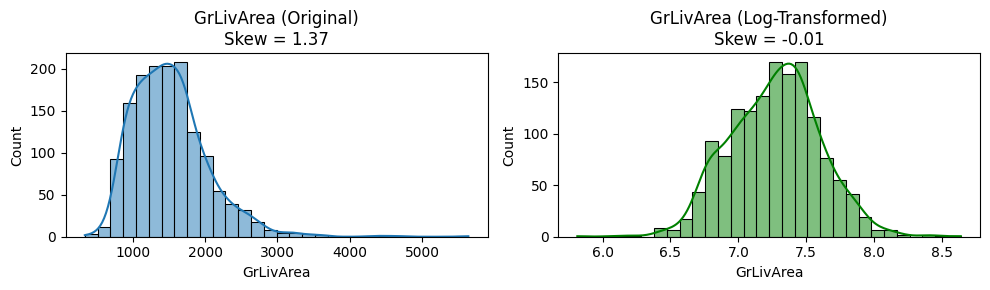

⚠️ Features with mostly zero values (excluded from log transform):


0          MiscVal
1         PoolArea
2        3SsnPorch
3     LowQualFinSF
4       BsmtFinSF2
5      ScreenPorch
6     BsmtHalfBath
7    EnclosedPorch
8       MasVnrArea
9       WoodDeckSF
Name: Mostly Zero Columns, dtype: object

✅ Features selected for log transformation based on skewness reduction:


0        LotArea
1    OpenPorchSF
2    LotFrontage
3     BsmtFinSF1
4     MSSubClass
5       1stFlrSF
6      GrLivArea
Name: Log Transform Features, dtype: object

In [75]:
# Calculate skewness for all numeric columns
numeric_skew = df_train[numeric_cols].skew().sort_values(ascending=False)

# Display skewness table
display(numeric_skew.to_frame(name='Skewness').style.background_gradient(cmap='coolwarm'))

# Select highly skewed numeric columns
high_skew_cols = numeric_skew[abs(numeric_skew) > 1].index.tolist()

# Plot original vs. log-transformed distributions with skew annotations
for col in high_skew_cols:
    original = df_train[col].dropna()
    transformed = np.log1p(original)

    original_skew = skew(original)
    transformed_skew = skew(transformed)

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Original
    sns.histplot(original, kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f"{col} (Original)\nSkew = {original_skew:.2f}")

    # Log-transformed
    sns.histplot(transformed, kde=True, ax=axes[1], bins=30, color='green')
    axes[1].set_title(f"{col} (Log-Transformed)\nSkew = {transformed_skew:.2f}")

    plt.tight_layout()
    plt.show()

# Identify features with mostly zero values (e.g., >80% zeros)
sparse_zero_cols = []

for col in high_skew_cols:
    zero_ratio = (df_train[col] == 0).mean()
    if zero_ratio > 0.5: # Adjust threshold as needed
        sparse_zero_cols.append(col)

print("⚠️ Features with mostly zero values (excluded from log transform):")
display(pd.Series(sparse_zero_cols, name='Mostly Zero Columns'))

# Select features for log transformation based on meaningful skew reduction AND not mostly zero
log_transform_features = []

for col in high_skew_cols:
    if col in sparse_zero_cols:
        continue  # Skip sparse features

    original = df_train[col].dropna()

    if original.min() < 0:
        continue  # skip negative values

    transformed = np.log1p(original)
    original_skew = abs(skew(original))
    transformed_skew = abs(skew(transformed))

    if (transformed_skew < original_skew * 0.75) and (transformed_skew < 2):
        log_transform_features.append(col)

# Display final selected features for log transformation
print("✅ Features selected for log transformation based on skewness reduction:")
display(pd.Series(log_transform_features, name='Log Transform Features'))


#### 3.5.3 Explore Relationships Between Numerical Features and SalePrice

🔍 Numerical Features with |Correlation| > 0.3:


,Correlation
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


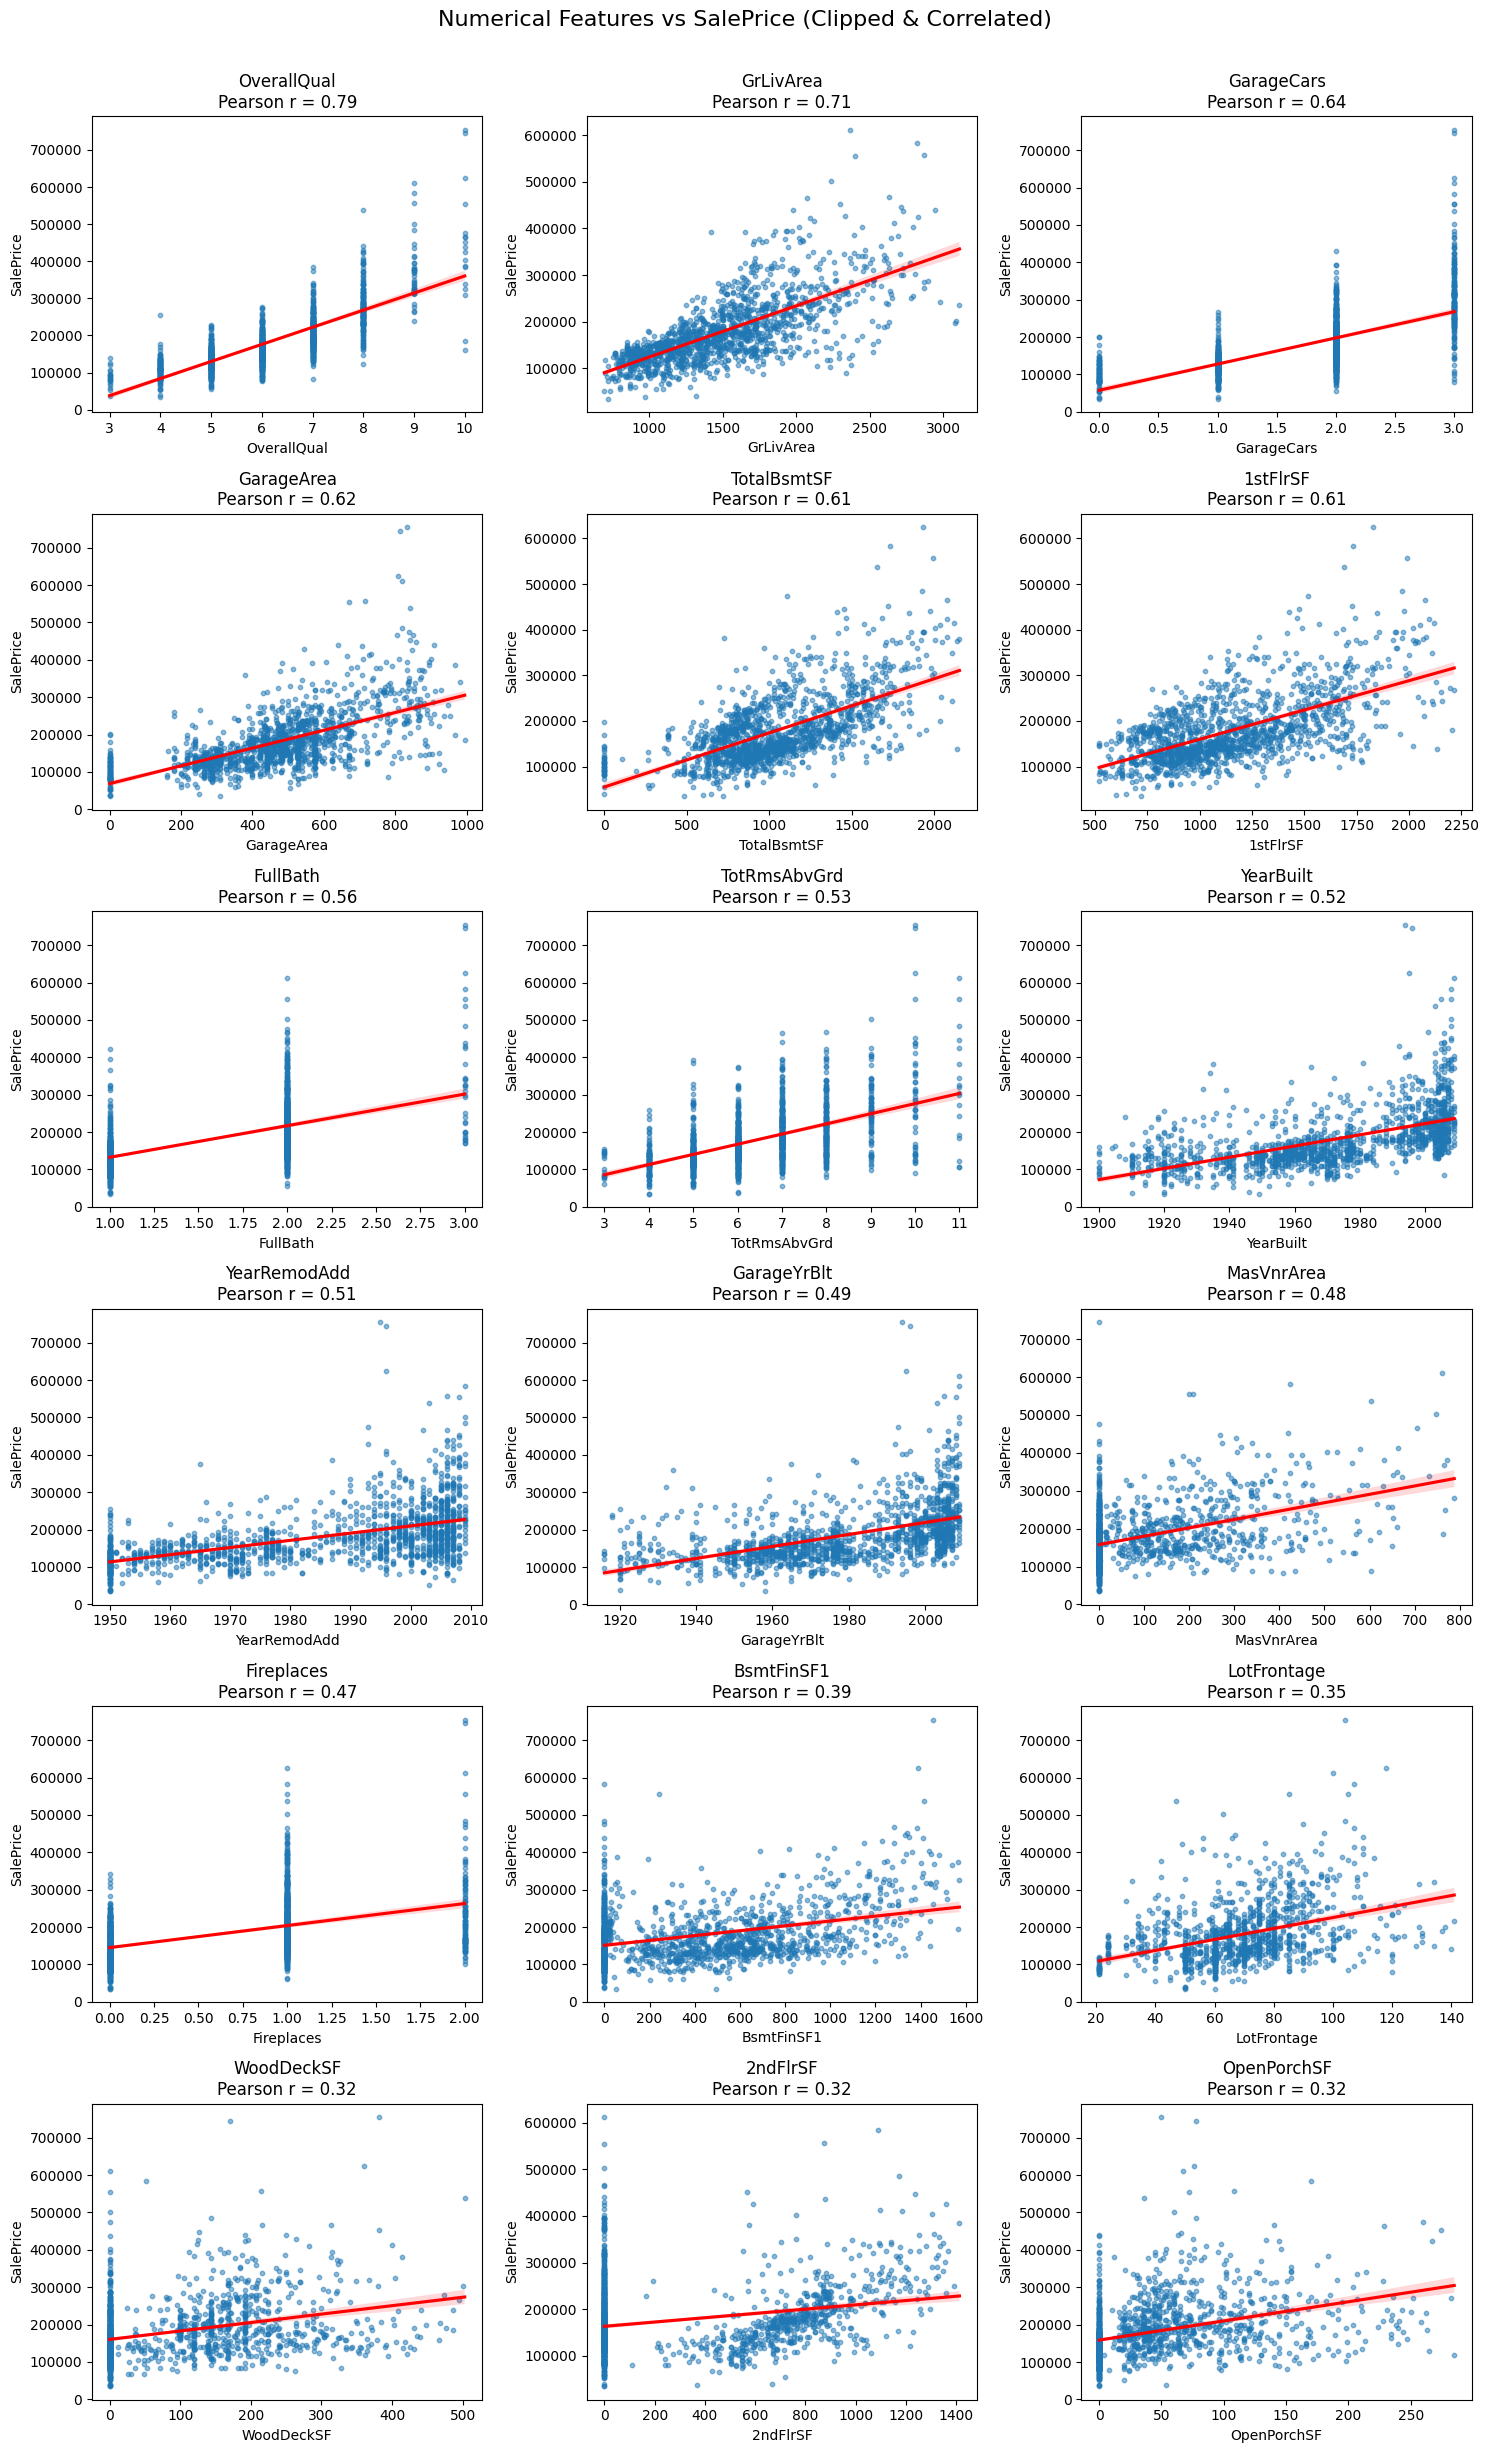

🧠 Mutual Information Scores with SalePrice:


,MI Score
OverallQual,0.572122
GrLivArea,0.483545
GarageCars,0.382155
TotalBsmtSF,0.368016
GarageArea,0.365109
YearBuilt,0.358279
1stFlrSF,0.309356
MSSubClass,0.277167
GarageYrBlt,0.263649
FullBath,0.254244


In [88]:
# Step 1: Compute correlations with SalePrice
correlation_series = df_train[numeric_cols + ['SalePrice']].corr()['SalePrice'].drop('SalePrice')

# Step 2: Set a correlation threshold
correlation_threshold = 0.3
filtered_corr = correlation_series[correlation_series.abs() > correlation_threshold].sort_values(key=abs, ascending=False)
selected_features = filtered_corr.index.tolist()

# Step 3: Display correlation values
print(f"🔍 Numerical Features with |Correlation| > {correlation_threshold}:")
display(filtered_corr.to_frame(name='Correlation').style.background_gradient(cmap='vlag'))

# Step 4: Grid layout of scatter plots with outlier clipping
cols = 3
rows = math.ceil(len(selected_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    x = df_train[col]
    y = df_train['SalePrice']

    # Clip outliers at 1st and 99th percentiles
    lower = x.quantile(0.01)
    upper = x.quantile(0.99)
    mask = (x >= lower) & (x <= upper)
    x_clipped = x[mask]
    y_clipped = y[mask]

    sns.regplot(x=x_clipped, y=y_clipped, ax=axes[i],
                scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})

    r = correlation_series[col]
    axes[i].set_title(f"{col}\nPearson r = {r:.2f}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numerical Features vs SalePrice (Clipped & Correlated)", fontsize=16, y=1.02)
plt.show()

# Calculate mutual information with SalePrice
# Fill missing values (required for MI calculation)
X_numeric = df_train[numeric_cols].fillna(0)
y_target = df_train['SalePrice']

# Compute mutual information scores
mi_scores = mutual_info_regression(X_numeric, y_target, discrete_features=False, random_state=42)
mi_series = pd.Series(mi_scores, index=numeric_cols).sort_values(ascending=False)

# Display top features by mutual information
print("🧠 Mutual Information Scores with SalePrice:")
display(mi_series.to_frame(name="MI Score").style.background_gradient(cmap='YlGn'))


### 3.6 Explore Categorical Features

#### 3.6.1 Overview of Categorical Variable's Distributions

In [91]:
# 3.6.1 Overview of Categorical Variable Distributions

# Step 1: Basic info
print(f"Total Categorical Features: {len(categorical_cols)}")

# Step 2: Count unique values per categorical column
cat_uniques = df_train[categorical_cols].nunique().sort_values(ascending=False)

# Step 3: Display as a styled DataFrame
cat_summary_df = cat_uniques.to_frame(name='Unique Values')
display(cat_summary_df.style.background_gradient(cmap='Blues'))

# Step 4: Flag potential encoding issues
high_cardinality = cat_summary_df[cat_summary_df['Unique Values'] > 10]
print("⚠️ High-cardinality categorical features (may need grouping or embedding):")
display(high_cardinality)


Total Categorical Features: 43


,Unique Values
Neighborhood,25
Exterior2nd,16
Exterior1st,15
SaleType,9
Condition1,9
Condition2,8
HouseStyle,8
RoofMatl,8
Functional,7
BsmtFinType2,6


⚠️ High-cardinality categorical features (may need grouping or embedding):


,Unique Values
Neighborhood,25
Exterior2nd,16
Exterior1st,15


#### 3.6.2 Category Feature Analysis

#### 3.6.3 Explore Relationship between Categorical Features and Sales Price

### 3.7 Explore Boolean Features

### 3.8 Explore Relationships